# Importing Modules

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Dataset Importing

In [2]:
data = pd.read_csv(r'C:\Users\adhit\ML Data sets\news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data.shape

(6335, 4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
labels = data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [13]:
labels.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [5]:
x_train, x_test, y_train, y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [6]:
x_train.shape

(5068,)

In [7]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(tfidf_train,y_train)
y_pred=lr.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.71%


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
knc.fit(tfidf_train,y_train)
y_pred=knc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 58.96%


In [21]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(tfidf_train,y_train)
y_pred=svc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.05%


In [50]:
from sklearn.svm import SVC
psvc = SVC(kernel = 'sigmoid', random_state = 0)
psvc.fit(tfidf_train,y_train)
y_pred=psvc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.21%


In [23]:
from sklearn.svm import SVC
rsvc = SVC(kernel = 'rbf', random_state = 0)
rsvc.fit(tfidf_train,y_train)
y_pred=rsvc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(tfidf_train,y_train)
y_pred = dtc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 80.66%


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(tfidf_train,y_train)
y_pred = rfc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.74%


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()  
gbc.fit(tfidf_train,y_train)
y_pred = gbc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.19%


In [37]:
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(tfidf_train,y_train)
y_pred = xgc.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

[20:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 91.16%


In [8]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


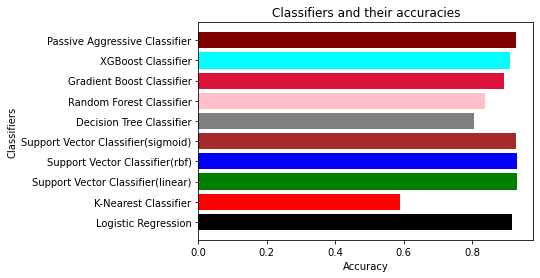

In [51]:
import matplotlib.pyplot as plt
classifiers = ['Logistic Regression', 'K-Nearest Classifier', 'Support Vector Classifier(linear)', 'Support Vector Classifier(rbf)', 'Support Vector Classifier(sigmoid)',
        'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boost Classifier', 'XGBoost Classifier', 'Passive Aggressive Classifier']

accuracies = [0.9171, 0.5896, 0.9305, 0.9321, 0.9290, 0.8066, 0.8374, 0.8919, 0.9116, 0.9290]
plt.barh(classifiers, accuracies, color=['black', 'red', 'green', 'blue', 'brown', 'grey', 'pink', 'crimson', 'cyan', 'maroon'])
 
plt.ylabel("Classifiers")
 
plt.xlabel("Accuracy")
plt.title("Classifiers and their accuracies")
plt.show()